In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
from fenics import *
from mshr import *
import numpy as np
from dotenv import load_dotenv
from scipy.ndimage import zoom
from scipy.interpolate import interp1d
import os
set_log_level(30)
# Cargar las variables del archivo .env
load_dotenv()

True

In [3]:
nueva_ruta = '/media/erick/TOSHIBA EXT/tests'
# Define time parameters
T = float(os.getenv('T'))
dt = float(os.getenv('dt'))
nb = int(os.getenv('nb'))
save_images = os.getenv('SAVE_IMAGES')

# Define time parameters
T = float(os.getenv('T'))
dt = float(os.getenv('dt'))
nb = 1

os.chdir(nueva_ruta)

In [4]:
def plot_correlation_length(field1_name, field2_name):
    """
    Carga los archivos de datos de correlación en el dominio del tiempo y de Fourier,
    y los grafica en dos imágenes separadas horizontalmente.

    Parámetros:
    - field1_name: str -> Nombre del primer campo.
    - field2_name: str -> Nombre del segundo campo.
    """

    # Nombres de los archivos
    file_real = f"corr_length_time_{field1_name}_{field2_name}.txt"
    file_fourier = f'corr_length_real_inverse_{field1_name}_{field2_name}.txt'

    try:
        # Cargar los datos
        data_real = np.loadtxt(file_real)
        data_fourier = np.loadtxt(file_fourier, skiprows=1)

        # Crear la figura con dos subgráficos horizontales
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

        # Gráfico 1: Longitud de correlación en el dominio del tiempo
        ax1.plot(data_real[:, 0], data_real[:, 1], 'b-', label="Real")
        ax1.set_xlabel("Tiempo")
        ax1.set_ylabel("Longitud de correlación")
        ax1.set_title("Longitud de correlación (Real)")
        ax1.legend()
        ax1.grid(True)

        # Gráfico 2: Longitud de correlación en el dominio de Fourier
        ax2.plot(data_fourier[:, 0], data_fourier[:, 1], 'r-', label="Fourier")
        ax2.set_xlabel("Tiempo")
        ax2.set_ylabel("Longitud de correlación")
        ax2.set_title("Longitud de correlación (Fourier inverso)")
        ax2.legend()
        ax2.grid(True)

        # Ajustar diseño y mostrar
        plt.tight_layout()
        plt.show()

    except OSError as e:
        print(f"Error al cargar los archivos: {e}")

In [22]:
def plot_autocorrelations():
    """Grafica las funciones de autocorrelación para c, s e i."""
    fields = ['c', 's', 'i']
    plt.figure(figsize=(8, 5))

    for field in fields:
        file_name = f"corr_length_real_inverse_{field1_name}_{field2_name}.txt"
        # try:
        data = np.loadtxt(file_name)
        time = data[:, 0]  # Primera columna: tiempo
        autocorr = data[:, 1]  # Segunda columna: autocorrelación

        plt.plot(time, autocorr, linestyle='-', label=f"Autocorrelación {field}")
        # except Exception as e:
        #     print(f"Error al leer {file_name}: {e}")

    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.xlabel("Tiempo")
    plt.ylabel("Autocorrelación")
    plt.title("Funciones de Autocorrelación")
    plt.legend()
    plt.grid()
    plt.show()


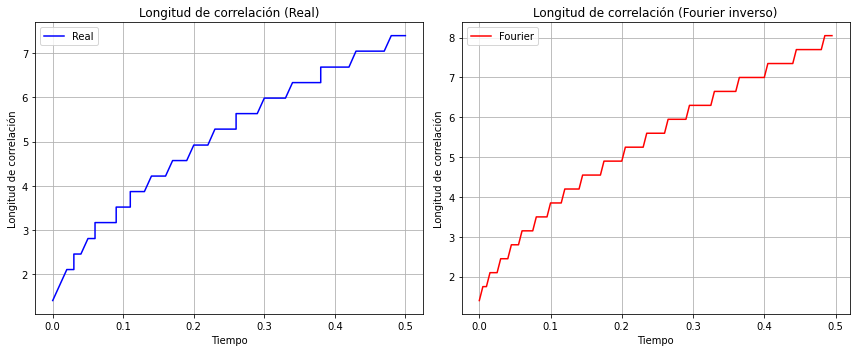

In [13]:
# Parámetros de entrada
field1_name = "c"  # Campo c (cáncer)
field2_name = "s"  # Campo s (células sanas)
plot_correlation_length(field1_name, field2_name)

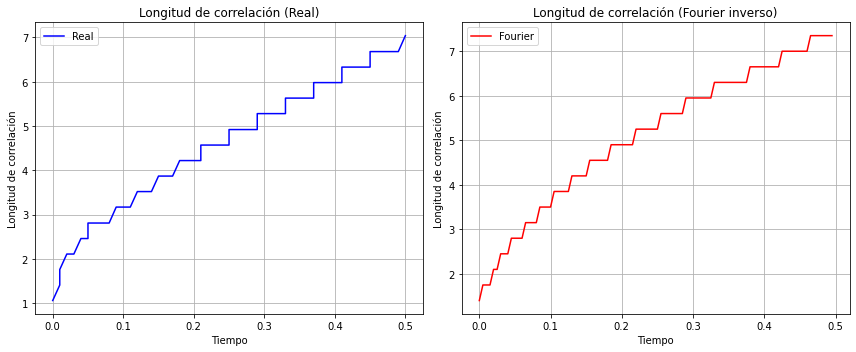

In [12]:
# Parámetros de entrada
field1_name = "c"  # Campo c (cáncer)
field2_name = "i"  # Campo s (células sanas)
plot_correlation_length(field1_name, field2_name)

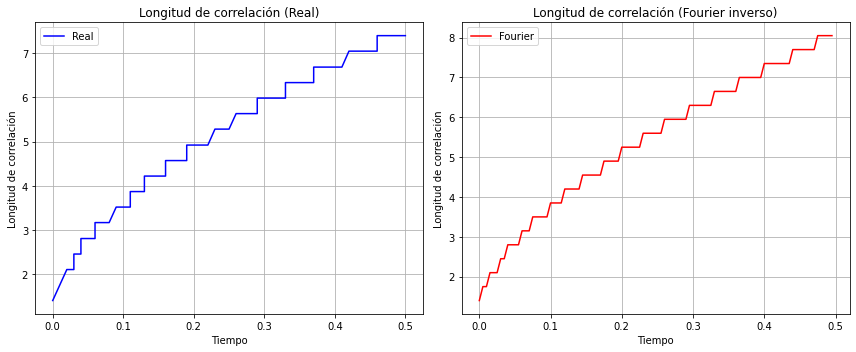

In [9]:
# Parámetros de entrada
field1_name = "s"  # Campo c (cáncer)
field2_name = "s"  # Campo s (células sanas)
plot_correlation_length(field1_name, field2_name)

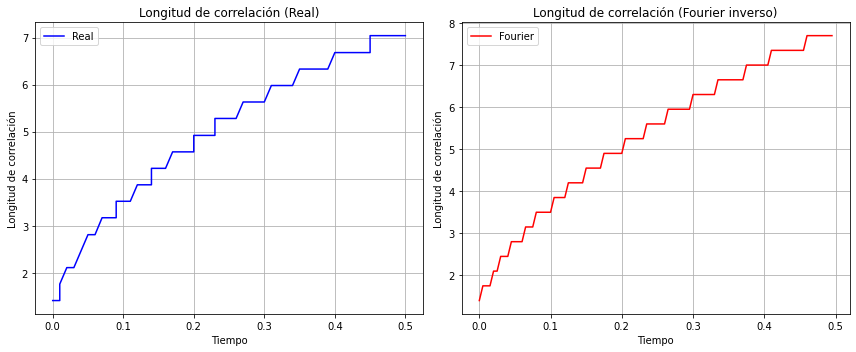

In [10]:
# Parámetros de entrada
field1_name = "c"  # Campo c (cáncer)
field2_name = "c"  # Campo s (células sanas)
plot_correlation_length(field1_name, field2_name)

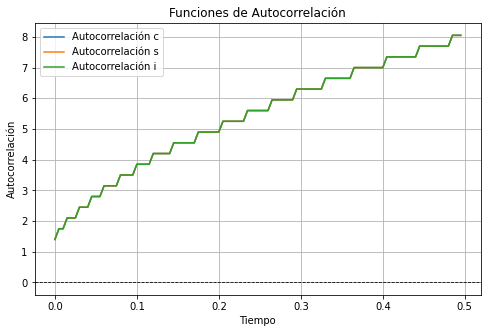

In [23]:
# Parámetros de entrada
field1_name = "c" 
field2_name = "s"
field3_name = "i"
plot_autocorrelations()